In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Period of earth's orbit
T = 365.25635

# Semi-major axis of earth's orbit
a = 1.00000011

# Period of Jupiter's orbit
Tj = 4332.589

# Semi-major axis of Jupiter's orbit

aj = 5.204267

# Period of Io's orbit
Ti = 1.769137786

# Semi-major axis of Io's orbit
ai = 0.002820

In [3]:
# Initial positions of earth and Jupiter
x0 = a
y0 = 0
xj0 = aj
yj0 = 0

# Initial positions of Io (relative to Jupiter
xi0 = ai
yi0 = 0

In [4]:
# Initial velocities of earth and Jupiter
vx0 = 0
vy0 = 2*np.pi*a/T
vxj0 = 0
vyj0 = 2*np.pi*aj/Tj

# Initial velocities of Io
vxi0 = 0
vyi0 = 2*np.pi*ai/Ti

# Initial acceleration of earth and Jupiter
ax0 = -4*np.pi**2*a/T**2
ay0 = 0
axj0 = -4*np.pi**2*aj/Tj**2
ayj0 = 0

# Initial acceleration of Io
axi0 = 4*np.pi**2*ai/Ti**2
ayi0 = 0

In [5]:
# Time step
dt = 0.01*0.001
dti = 0.01*0.001

# Number of time steps
N = 36500000
Ni = 36500000

# Time array
t = np.linspace(0, N*dt, N+1)
ti = np.linspace(0, Ni*dti, Ni+1)

# Earth's position arrays
x = np.zeros(N+1)
y = np.zeros(N+1)

# Jupiter's position arrays
xj = np.zeros(N+1)
yj = np.zeros(N+1)

# Io's position arrays
xi = np.zeros(Ni+1)
yi = np.zeros(Ni+1)

In [6]:
# Earth's velocity arrays
vx = np.zeros(N+1)
vy = np.zeros(N+1)

# Jupiter's velocity arrays
vxj = np.zeros(N+1)
vyj = np.zeros(N+1)

# Io's velocity arrays
vxi = np.zeros(Ni+1)
vyi = np.zeros(Ni+1)

# Earth's acceleration arrays
ax = np.zeros(N+1)
ay = np.zeros(N+1)

# Jupiter's acceleration arrays
axj = np.zeros(N+1)
ayj = np.zeros(N+1)

# Io's acceleration arrays
axi = np.zeros(Ni+1)
ayi = np.zeros(Ni+1)

In [7]:
# Initial conditions
x[0] = x0
y[0] = y0
xj[0] = xj0
yj[0] = yj0
xi[0] = xi0
yi[0] = yi0

vx[0] = vx0
vy[0] = vy0
vxj[0] = vxj0
vyj[0] = vyj0
vxi[0] = vxi0
vyi[0] = vyi0

ax[0] = ax0
ay[0] = ay0
axj[0] = axj0
ayj[0] = ayj0
axi[0] = axi0
ayi[0] = ayi0


In [8]:
# Euler's method
i=-1
# print(i, x[i+1], y[i+1], vx[i+1], vy[i+1], ax[i+1], ay[i+1])

for i in range(N):
    x[i+1] = x[i] + vx[i]*dt
    y[i+1] = y[i] + vy[i]*dt
    xj[i+1] = xj[i] + vxj[i]*dt
    yj[i+1] = yj[i] + vyj[i]*dt
   
    vx[i+1] = vx[i] + ax[i]*dt
    vy[i+1] = vy[i] + ay[i]*dt
    vxj[i+1] = vxj[i] + axj[i]*dt
    vyj[i+1] = vyj[i] + ayj[i]*dt
   
    r = np.sqrt(x[i+1]**2 + y[i+1]**2)
    v = np.sqrt(vx[i+1]**2 + vy[i+1]**2)
    ax[i+1] = -v**2/r*x[i+1]/r
    ay[i+1] = -v**2/r*y[i+1]/r
    
    rj = np.sqrt(xj[i+1]**2 + yj[i+1]**2)
    vj = np.sqrt(vxj[i+1]**2 + vyj[i+1]**2)
    axj[i+1] = -vj**2/rj*xj[i+1]/rj
    ayj[i+1] = -vj**2/rj*yj[i+1]/rj
    
    #print(i, x[i+1], y[i+1], vx[i+1], vy[i+1], ax[i+1], ay[i+1])
    
for i in range(Ni):
    xi[i+1] = xi[i] + vxi[i]*dti
    yi[i+1] = yi[i] + vyi[i]*dti
    
    vxi[i+1] = vxi[i] + axi[i]*dti
    vyi[i+1] = vyi[i] + ayi[i]*dti
    
    ri = np.sqrt(xi[i+1]**2 + yi[i+1]**2)
    vi = np.sqrt(vxi[i+1]**2 + vyi[i+1]**2)
    
    axi[i+1] = -vi**2/ri*xi[i+1]/ri
    ayi[i+1] = -vi**2/ri*yi[i+1]/ri
    
    

-1 1.00000011 0.0 0.0 0.017202126666189296 -0.00029591312928917656 0.0


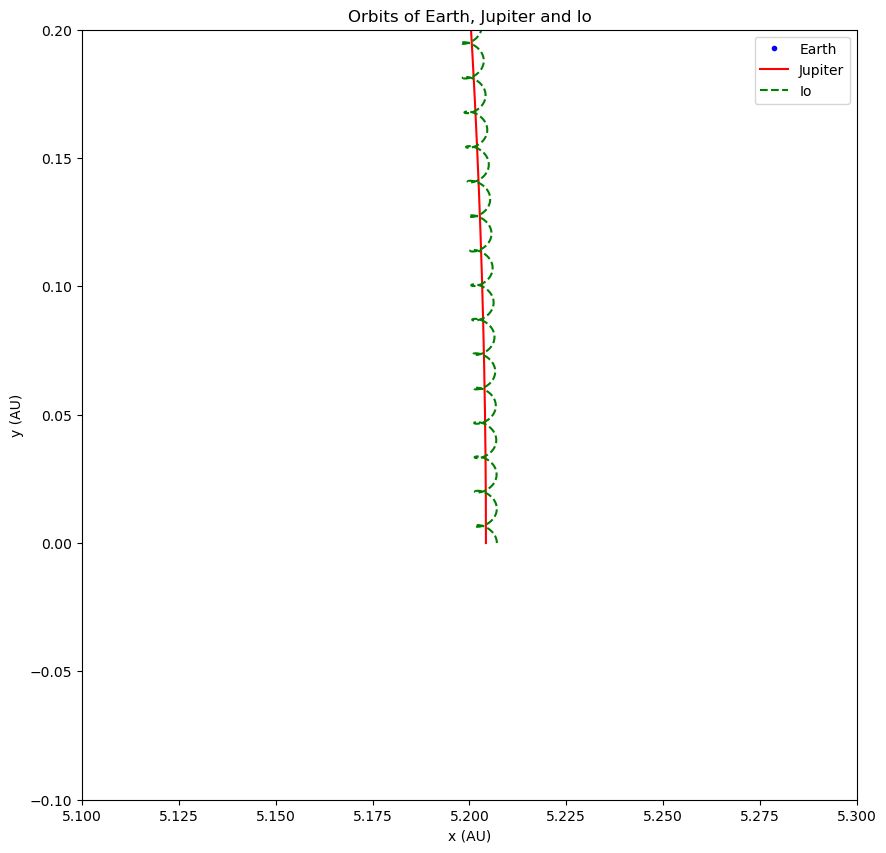

In [9]:
# Plotting the orbits of earth and Jupiter
plt.figure(figsize=(10,10))
plt.plot(x, y, 'b.', label='Earth')
plt.plot(xj, yj, 'r-', label='Jupiter')
plt.plot(xi+xj, yi+yj, 'g--', label='Io')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.title('Orbits of Earth, Jupiter and Io')
plt.xlim(5.1,5.3)
plt.ylim(-0.1,0.2)
#plt.axis('equal')
plt.legend()

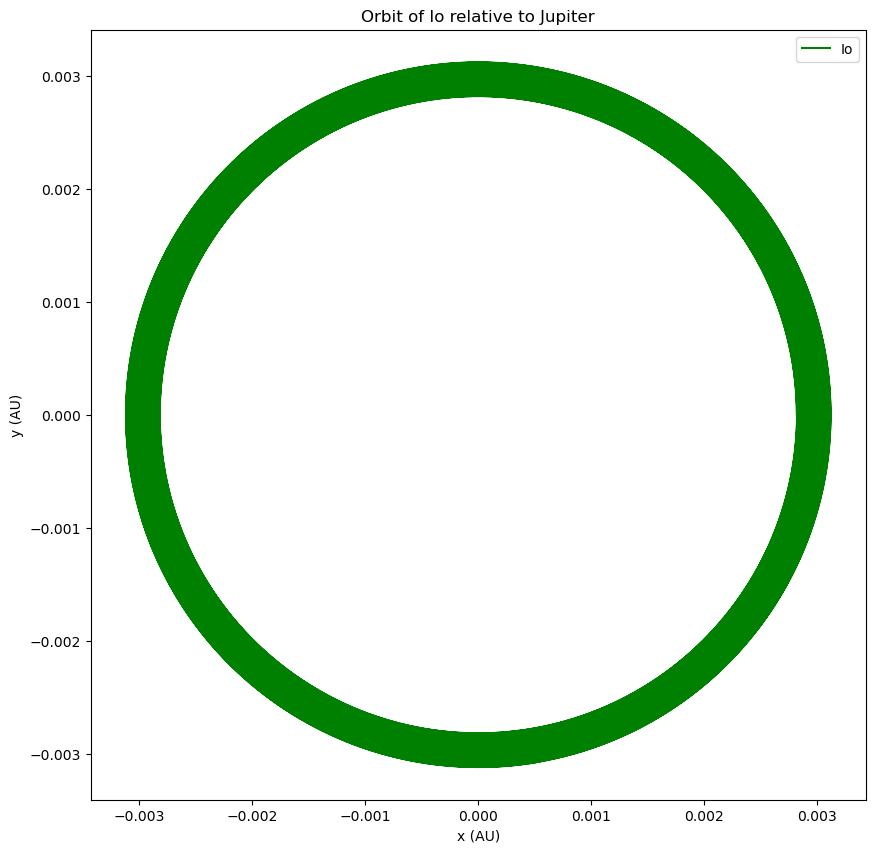

In [10]:
# Plot the orbit of Io relative to Jupiter
plt.figure(figsize=(10,10))
plt.plot(xi, yi, 'g-', label='Io')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.title('Orbit of Io relative to Jupiter')
#plt.xlim(0.7,1.3)
#plt.ylim(-0.3,0.3)
plt.axis('equal')
plt.legend()


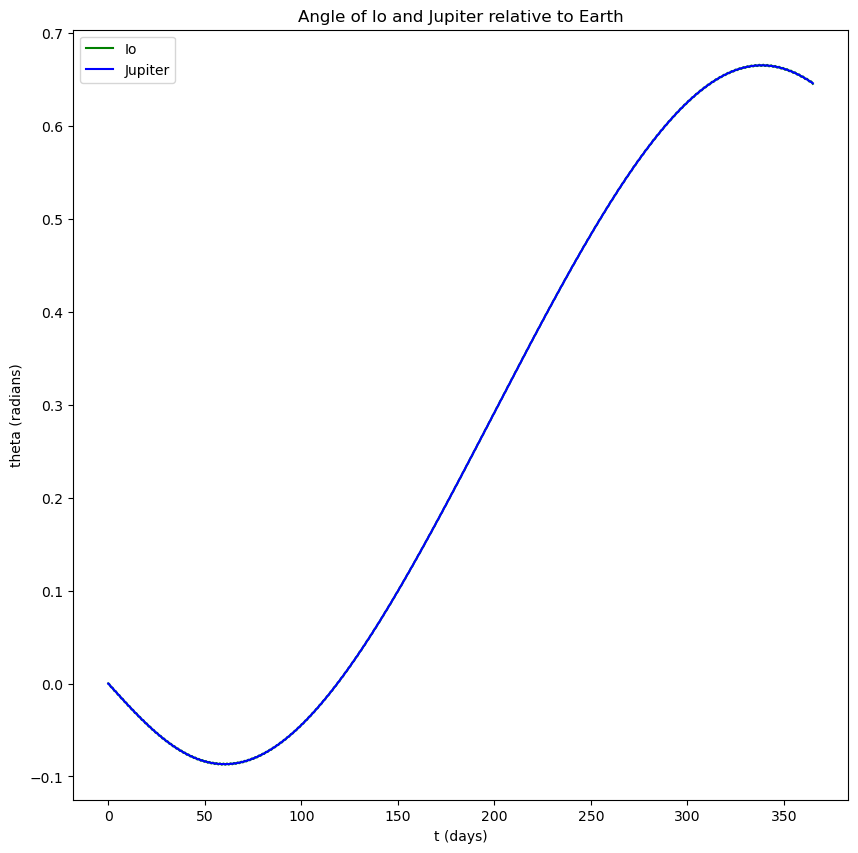

In [14]:
# Calculate the angle of Io relative to Earth
xie = xi + xj - x
yie = yi + yj - y
thetaie = np.arctan2(yie, xie)
#for i in range(len(thetai)):
#    if thetaie[i] < 0:
#        thetaie[i] = thetaie[i] + 2*np.pi

# Calculate the angle of Jupiter relative to Earth
xje = xj - x
yje = yj - y
thetaje = np.arctan2(yje, xje)
#for i in range(len(thetaje)):
#    if thetaje[i] < 0:
#        thetaje[i] = thetaje[i] + 2*np.pi

# Plot the angle of Io relative to Earth against time
plt.figure(figsize=(10,10))
plt.plot(t, thetaie, 'g-', label='Io')
plt.plot(t, thetaje, 'b-', label='Jupiter')
plt.xlabel('t (days)')
plt.ylabel('theta (radians)')
plt.title('Angle of Io and Jupiter relative to Earth')
plt.legend()

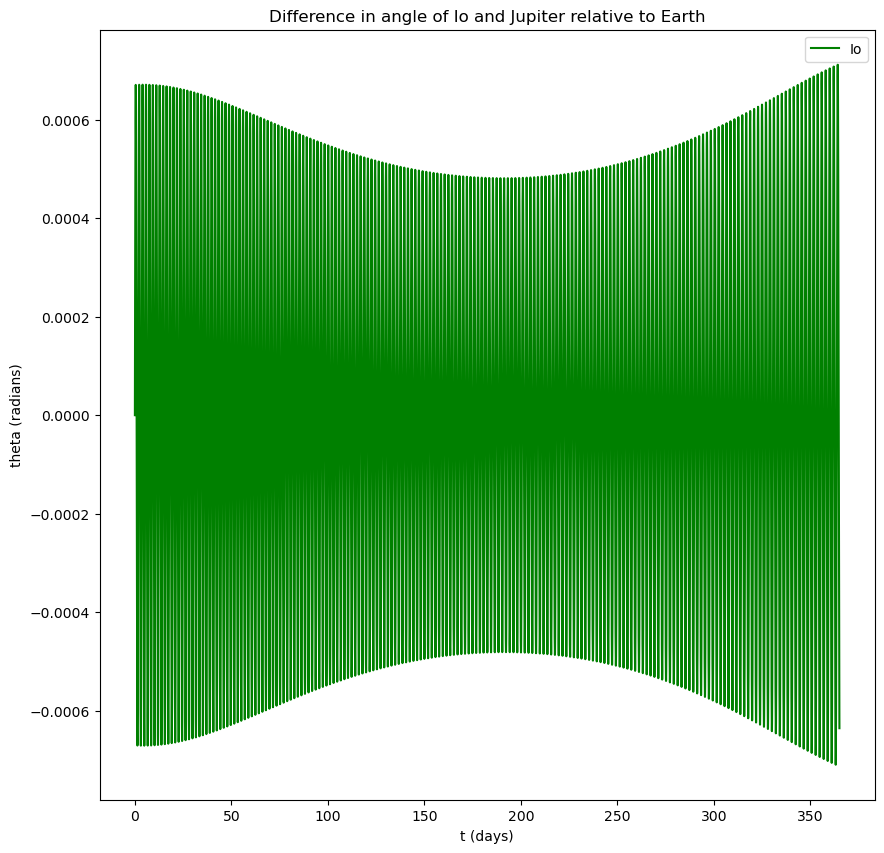

In [15]:
# Plot the difference in angle of Io and Jupiter relative to Earth
plt.figure(figsize=(10,10))
plt.plot(t, thetaie-thetaje, 'g-', label='Io')
plt.xlabel('t (days)')
plt.ylabel('theta (radians)')
plt.title('Difference in angle of Io and Jupiter relative to Earth')
plt.legend()



[  0.        0.88419   1.76878   2.65376   3.53914   4.42492   5.31109
   6.19765   7.08462   7.97198   8.85974   9.7479   10.63645  11.52541
  12.41476  13.30452  14.19467  15.08523  15.97619  16.86754  17.7593
  18.65147  19.54403  20.437    21.33037  22.22415  23.11833  24.01291
  24.9079   25.80329  26.69909  27.5953   28.49191  29.38893  30.28636
  31.18419  32.08243  32.98108  33.88014  34.7796   35.67948  36.57976
  37.48045  38.38155  39.28307  40.18499  41.08732  41.99007  42.89322
  43.79678  44.70076  45.60515  46.50995  47.41516  48.32079  49.22682
  50.13327  51.04013  51.94741  52.85509  53.7632   54.67171  55.58064
  56.48998  57.39973  58.3099   59.22049  60.13148  61.0429   61.95472
  62.86696  63.77962  64.69269  65.60617  66.52007  67.43439  68.34912
  69.26426  70.17982  71.0958   72.01219  72.929    73.84622  74.76386
  75.68191  76.60038  77.51927  78.43857  79.35828  80.27841  81.19896
  82.11993  83.04131  83.9631   84.88532  85.80794  86.73099  87.65445
  88.57

Text(0.5, 1.0, 'Period of Io')

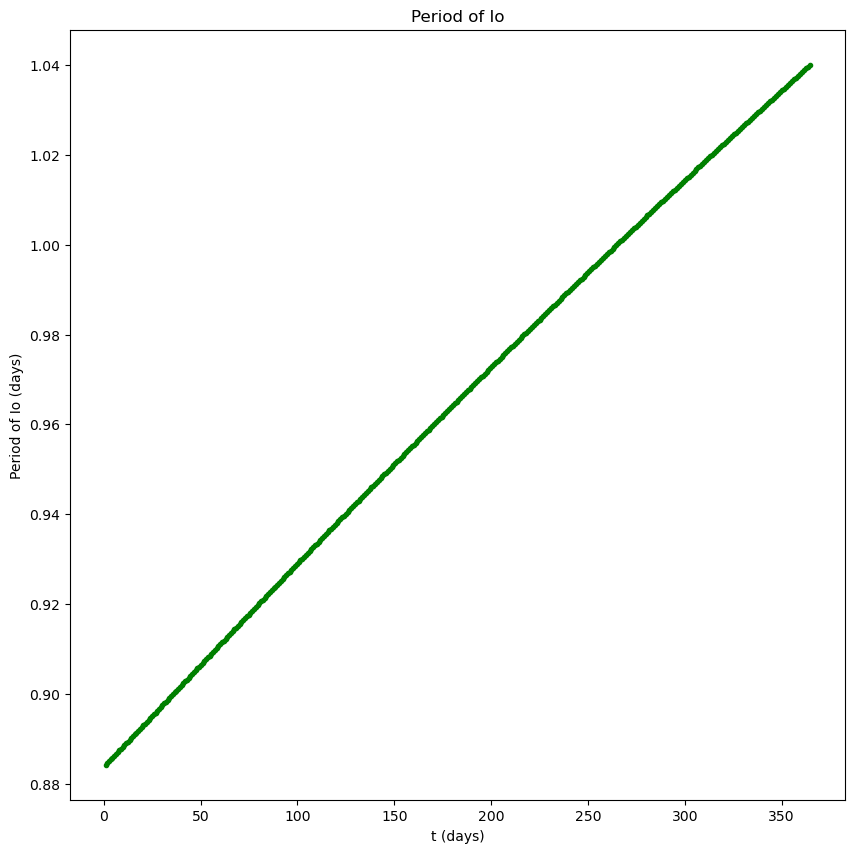

In [19]:
# Find the zeroes of the difference in angle of Io and Jupiter relative to Earth

# Find the indices of the zeroes
indices = np.where(np.diff(np.sign(thetaie-thetaje)))[0]

print(t[indices])

# Find the times of the zeroes
times = t[indices]

# Find the periods of Io
periods = np.diff(times)

# Plot the periods of Io
plt.figure(figsize=(10,10))
plt.plot(times[1:], periods, 'g.')
plt.xlabel('t (days)')
plt.ylabel('Period of Io (days)')
plt.title('Period of Io')